<a href="https://colab.research.google.com/github/ahberson/Berson_QNC_Fall2025/blob/main/Berson_092325_ParametricCorrelations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

These are the questions from Parametric Correlation Coefficient.ipynb but some of the syntax didn't copy. I still referred to the original GitHub notebook for the exact questions:



Assume Wing length is the
 variable and Tail Length is the
 variable, both measured in cm.

Answers to the questions below will be found here after the due date.

1. Plot X vs Y. Do they look related?
2. Calculate
 and
, first using the equations above and then using either the Python numpy funciton corrcoef or Matlab's built-in corrcoef. Did you get the same answers?
3. What is the standard error of
? The 95% confidence intervals computed from the standard error?
4. Should the value of
 be considered significant at the p<0.05 level, given a two-tailed test (i.e., we reject if the test statistic is too large on either tail of the null distribution) for
?
5. Yale does the exact same study and finds that his correlation value is 0.75. Is this the same as yours? That is, evaluate
.
6. Finally, calculate the statistical power and sample size needed to reject
.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


**Question 1**

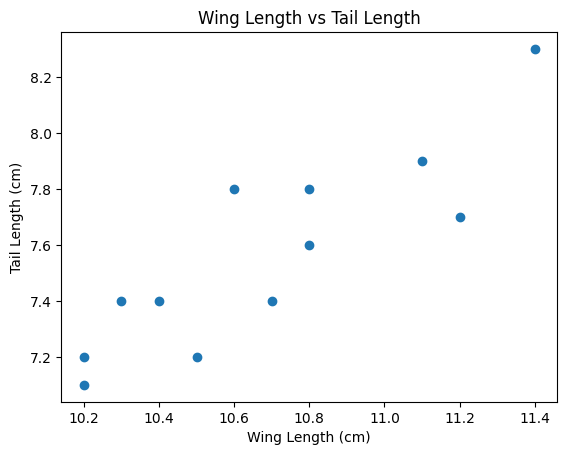

In [3]:

wing_length = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail_length = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

plt.figure()
plt.plot(wing_length, tail_length, 'o')
plt.xlabel('Wing Length (cm)')
plt.ylabel('Tail Length (cm)')
plt.title('Wing Length vs Tail Length')
plt.show()


There looks to be a positive correlation, but the variance is large.

**Question 2**

In [4]:
r_manual = np.sum((wing_length - np.mean(wing_length)) * (tail_length - np.mean(tail_length))) / np.sqrt(np.sum((wing_length - np.mean(wing_length))**2) * np.sum((tail_length - np.mean(tail_length))**2))
r_numpy = np.corrcoef(wing_length, tail_length)[0, 1]
print(r_manual)
print(r_numpy)

0.8703545613058226
0.8703545613058227


Yes, I got (nearly) the same answers, just varying in past the 10th decimal point.

**Question 3**

In [9]:
se_r = np.sqrt((1 - r_manual**2) / (len(wing_length) - 2))
print("The standard error of r is", se_r)

z = 0.5 * np.log((1 + r_manual) / (1 - r_manual))
se_z = 1 / np.sqrt(len(wing_length) - 3)
alpha = 0.05
z_crit = stats.norm.ppf(1-alpha/2)  # 95% CI

z_CI = [z - z_crit * se_z, z + z_crit * se_z]
r_CI = [(np.exp(2*zv) - 1) / (np.exp(2*zv) + 1) for zv in z_CI]

print("The 95% confidence interval for r is", float(r_CI[0]), "to", float(r_CI[1]))

The standard error of r is 0.15571863652567383
The 95% confidence interval for r is 0.5923110780844785 to 0.9631598602746105


**Question 4**

In [10]:
t_stat = r_manual / se_r
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=len(wing_length)-2))
print("The p-value is", p_value)

The p-value is 0.00023110594312059085


Since our p-value is below 0.05, we can reject our null hypothesis and consider our r(x,y) to be significant.

**Question 5**

In [12]:
r0 = 0.75
z0 = 0.5 * np.log((1 + r0) / (1 - r0))
lambaz = (z-z0) / se_z
p_value0 = 2 * (1 - stats.norm.cdf(abs(lambaz)))
print("The p-value for the null hypothesis is", p_value0)

The p-value for the null hypothesis is 0.2780303018608836


Our p-value is now above 0.05 so we accept the null hypothesis. We cannot say that our results are significant.

**Question 6**

In [17]:
r_rej = 0.5
z_rej = 0.5 * np.log((1 + r_rej) / (1 - r_rej))
lambdaz_rej = (z-z_rej) / np.sqrt(1/(len(wing_length)-3))
#use z_crit from above for alpha 0.05
pow = 1 - stats.norm.cdf(z_crit - lambdaz_rej) #proportion of distribution right of lambda
print("Required power with current n is ",pow) #this tells us the power (prob of rejecting null) with our current n

# I was confused by how to find n since you need n to find power and visa versa
# I'm assuming the question meant what is the n needed for a high power value, but this is just a guess
# so, we have to decide on a desired_power to find a required n, which I'm saying is 0.95
# Would be interested in hearing if there's another method which doesn't require us to set a power value
desired_power = 0.95

# we can use the power formula from before and rearrange some things
# power = 1 - stats.norm.cdf(z_crit - lambda)
# our n will come from lambda but this requires us to take the inverse function of stats.norm.cdf
# upon looking this up, it seems that stats.norm.ppf does this but not sure as to why - maybe discuss in class?
# lambda = z_crit - stats.norm.ppf(1-power)
# (z-z_rej)/np.sqrt(1/(n-3)) = z_crit - stats.norm.ppf(1-power)
# n = 1/( (z-z_rej)/(z_crit - stats.norm.ppf(1-power)) )^2  +  3
n = 1/((z-z_rej)/(z_crit - stats.norm.ppf(1-desired_power)))**2 + 3
print("Required n for 0.95 power is", n)

Required power with current n is  0.653850668177187
Required n for 0.95 power is 24.075048281467865
